In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import folium
import gmaps
import os
from expected import expected
from countryinfo import CountryInfo
from config import gkey

In [2]:
# Stacy start

In [3]:
# Import naturalization data
filename = 'naturalization_filed_denied.csv'
path = os.path.join('.', 'Output_files', filename)
nat_df = pd.read_csv(path)

nat_df.set_index(keys='Year', inplace=True)

## Overall US naturalization trends

In [4]:
# Descriptive statistics

# What is the minimum number of petitions filed, denied, and citizens naturalized, and what year did they occur?
filed_min = nat_df['Petitions filed'].min()
denied_min = nat_df['Petitions denied'].min()
naturalized_min = nat_df['Naturalized, total'].min()

print(f"MINIMUMS: Petitions filed: {filed_min} | Petitions denied: {denied_min} | Naturalized: {naturalized_min}")

# denied_min = nat_df['Petitions denied'].min()
print(f"YEARS: {nat_df[['Petitions filed', 'Petitions denied', 'Naturalized, total']].idxmin().values}")

# What is the maximum number of petitions filed, denied, and citizens naturalized, and what year did they occur?
filed_max = nat_df['Petitions filed'].max()
denied_max = nat_df['Petitions denied'].max()
naturalized_max = nat_df['Naturalized, total'].max()

print(f"MAXIMUMS: Petitions filed: {filed_max} | Petitions denied: {denied_max} | Naturalized: {naturalized_max}")

# denied_min = nat_df['Petitions denied'].min()
print(f"YEARS: {nat_df[['Petitions filed', 'Petitions denied', 'Naturalized, total']].idxmax().values}")

# What is the average number of petitions filed, denied, and citizens naturalized?
filed_mean = nat_df['Petitions filed'].mean()
denied_mean = nat_df['Petitions denied'].mean()
naturalized_mean = nat_df['Naturalized, total'].mean()

print(f"AVERAGE PER YEAR (MEAN): Petitions filed: {round(filed_mean,2)} | Petitions denied: {round(denied_mean,2)} | Naturalized: {round(naturalized_mean,2)}")

MINIMUMS: Petitions filed: 21113 | Petitions denied: 250 | Naturalized: 7941
YEARS: [1907 1907 1907]
MAXIMUMS: Petitions filed: 1412712 | Petitions denied: 399670 | Naturalized: 1046539
YEARS: [1997 2000 2008]
AVERAGE PER YEAR (MEAN): Petitions filed: 307141.66 | Petitions denied: 33381.94 | Naturalized: 271826.24


### Takeaways
* **1907 saw the lowest number of petitions filed and denied and naturalizations.** There were very restrictive immigration policies in place prior to 1907, particularly related to specific nationalities. The Immigration Act of 1907 paved the way for increases in overall immigration numbers over time.
* **The late 1990's and early 2000's saw the greatest number of petitions filed and denied and naturalizations.** The peak in petitions denied is worth exploring.
* **There was roughly a 10:1 ratio between the average number of petitions filed and denied each year.**
* **On average, the US naturalized around 270,000 immigrants per year.**

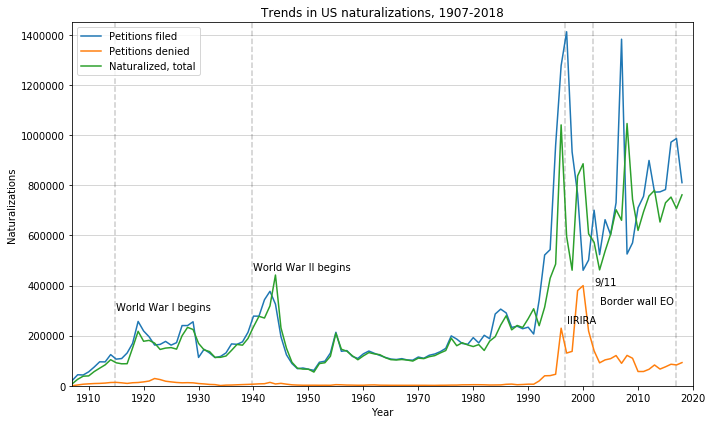

In [7]:
# Plot the naturalization data - overall

plt.figure(figsize=(10,6))
plt.plot(nat_df.index, nat_df[['Petitions filed', 'Petitions denied', 'Naturalized, total']])
plt.legend(loc='best', labels=['Petitions filed', 'Petitions denied', 'Naturalized, total'])
plt.xlim(1907, 2020)
plt.ylim(-1,1450000)
plt.xticks(np.arange(1910, 2021, step=10))
plt.grid(b=True, axis='y', color='#cccccc')

# Add points of interest to grid
plt.annotate(xy=(1915,300000), s='World War I begins')
plt.vlines(x=1914.8, ymin = 0, ymax = 1450000, linestyle='dashed', alpha=0.2)
plt.annotate(xy=(1940,460000), s='World War II begins')
plt.vlines(x=1939.75, ymin = 0, ymax = 1450000, linestyle='dashed', alpha=0.2)
plt.annotate(xy=(1997,250000), s='IIRIRA')
plt.vlines(x=1996.75, ymin = 0, ymax = 1450000, linestyle='dashed', alpha=0.2)
plt.annotate(xy=(2002,400000), s='9/11')
plt.vlines(x=2001.75, ymin = 0, ymax = 1450000, linestyle='dashed', alpha=0.2)
plt.annotate(xy=(2003,325000), s='Border wall EO')
plt.vlines(x=2017, ymin = 0, ymax = 1450000, linestyle='dashed', alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Naturalizations")
plt.title("Trends in US naturalizations, 1907-2018")
plt.tight_layout()

plt.savefig('./Images/overall_naturalizations.png')

# Spike in 1996 - and general increase - can be explained by this bill: https://www.vox.com/2016/4/28/11515132/iirira-clinton-immigration

### Takeaways
We observed large spikes in petitions filed and naturalizations following globally disruptive events in the early 20th century (the World Wars). Towards the start of the 21st century, we see a spike in the number of petitions denied, likely due to the introduction of a restrictive law called [IIRIA](https://www.law.cornell.edu/wex/illegal_immigration_reform_and_immigration_responsibility_act) during the Clinton years.

## Major events and overall immigration rates in detail

### 9/11 (September 2001)

Text(0.5, 1.0, 'Trends in US naturalizations, before and after 9/11')

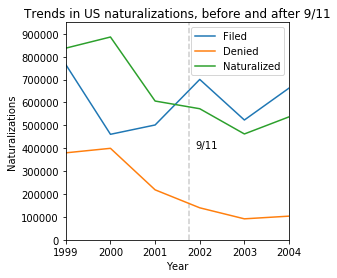

In [8]:
# Pre and post 9/11
# create df
nat_911 = nat_df.loc[1999:2004,:]

# plot data
plt.figure(figsize=(4,4))
plt.plot(nat_911.index, nat_911[['Petitions filed', 'Petitions denied', 'Naturalized, total']])
plt.legend(loc='best', labels=['Filed', 'Denied', 'Naturalized'])
plt.xlim(1999,2003)
plt.ylim(0,950000)
plt.xticks(np.arange(1999,2005))
plt.yticks(np.arange(0,1000000, step=100000))
plt.annotate(xy=(2001.9,400000), s='9/11')
plt.vlines(x=2001.75, ymin = 0, ymax = 1450000, linestyle='dashed', alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Naturalizations")
plt.title("Trends in US naturalizations, before and after 9/11")

### Trump's "border wall" executive order (January 2017)

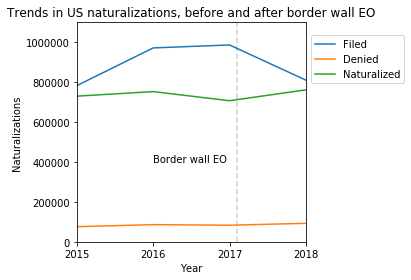

In [9]:
# Pre and post Trump
# create df
nat_trump = nat_df.loc[2015:2018,:]

# plot data
plt.figure(figsize=(5.75,4))
plt.plot(nat_trump.index, nat_trump[['Petitions filed', 'Petitions denied', 'Naturalized, total']])
plt.legend(loc='lower left', labels=['Filed', 'Denied', 'Naturalized'], bbox_to_anchor=(1, 0.7))
plt.annotate(xy=(2016,400000), s='Border wall EO')
plt.vlines(x=2017.1, ymin = 0, ymax = 1450000, linestyle='dashed', alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Naturalizations")
plt.title("Trends in US naturalizations, before and after border wall EO")
plt.xlim(2015,2018)
plt.ylim(0,1100000)
plt.xticks(np.arange(2015,2019))
plt.yticks(np.arange(0,1100000, step=200000))
plt.tight_layout()

### Illegal Immigration Reform and Immigration Responsibility Act (IIRIA) (1996)

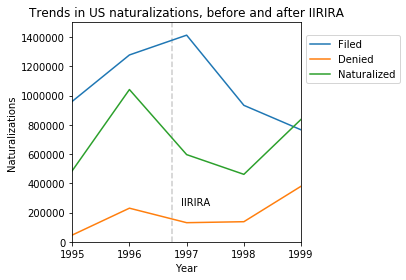

In [10]:
# Pre and post IIRIRA
# create df
nat_iiria = nat_df.loc[1995:1999,:]

# plot data
plt.figure(figsize=(5.75,4))
plt.plot(nat_iiria.index, nat_iiria[['Petitions filed', 'Petitions denied', 'Naturalized, total']])
plt.legend(loc='lower left', labels=['Filed', 'Denied', 'Naturalized'], bbox_to_anchor=(1, 0.7))
plt.xlabel("Year")
plt.ylabel("Naturalizations")
plt.title("Trends in US naturalizations, before and after IIRIRA")
plt.annotate(xy=(1996.9,250000), s='IIRIRA')
plt.vlines(x=1996.75, ymin = 0, ymax = 1500000, linestyle='dashed', alpha=0.2)
plt.xlim(1995,1999)
plt.ylim(0,1500000)
plt.xticks(np.arange(1995,2000))
plt.yticks(np.arange(0,1500000, step=200000))
plt.tight_layout()

### Takeaways
* Post 9/11, we saw a downward trend in overall number of petitions filed and denied and naturalizations. 
* Post Trump border wall EO, we saw a downward trend in the overall number of petitions filed, but no major rise in the number of petitions denied. Interestingly, the number of naturalizations actually increased post-Order.
* IIRIA appears to have had the biggest effect upon the number of petitions filed, which dramatically decreased, and a major increase in number of petitions denied.

## Are these changes statistically significant?
### IIRIA

In [11]:
### IIRIA DATA
# Are these trends statistically significant? Apply chi-squared test.

# Get the sample size for petitions filed, denied
# Drop naturalization data (due to lag in how quickly policy changes might affect nat numbers)
nat_iiria_df = nat_iiria.drop(columns=['Naturalized, total'])
# # Create new column to show petitions in pipeline (return to this if needed)
# nat_iiria_df['Petitions in pipeline'] = nat_iiria_df['Petitions filed'] - nat_iiria_df['Petitions denied']
nat_total_pet_filed = nat_iiria_df.loc[:,'Petitions filed'].sum()
nat_total_pet_denied = nat_iiria_df.loc[:,'Petitions denied'].sum()

# Get the sample size for the years
nat_95 = nat_iiria_df.loc[1995,:].sum()
nat_96 = nat_iiria_df.loc[1996,:].sum()
nat_97 = nat_iiria_df.loc[1997,:].sum()
nat_98 = nat_iiria_df.loc[1998,:].sum()
nat_99 = nat_iiria_df.loc[1999,:].sum()

In [12]:
# Get population size
nat_totals = nat_total_pet_filed + nat_total_pet_denied

In [13]:
# Get expected values using 'expected' function we imported

# Calculate expected value for petitions filed in 95-97 (pre-IIRIA)
expected_filed_95 = expected(nat_95, nat_total_pet_filed, nat_totals)
expected_filed_96 = expected(nat_96, nat_total_pet_filed, nat_totals)
expected_filed_97 = expected(nat_97, nat_total_pet_filed, nat_totals)

# Calculate expected value for petitions filed in 98-99 (post-IIRIA)
expected_filed_98 = expected(nat_98, nat_total_pet_filed, nat_totals)
expected_filed_99 = expected(nat_99, nat_total_pet_filed, nat_totals)

# Calculate expected value for petitions denied 95-97
expected_denied_95 = expected(nat_95, nat_total_pet_denied, nat_totals)
expected_denied_96 = expected(nat_96, nat_total_pet_denied, nat_totals)
expected_denied_97 = expected(nat_97, nat_total_pet_denied, nat_totals)

# Calculate expected value for petitions denied 98-99
expected_denied_98 = expected(nat_98, nat_total_pet_denied, nat_totals)
expected_denied_99 = expected(nat_99, nat_total_pet_denied, nat_totals)

# Create list so we can loop through these in a moment
expected_filed = [expected_filed_95, expected_filed_96, expected_filed_97, expected_filed_98, expected_filed_99]
denied = [expected_denied_95, expected_denied_96, expected_denied_97, expected_denied_98, expected_denied_99]

In [14]:
degrees_freedom = 4
crit_value = 9.49

In [15]:
# Apply chi-squared test for petitions filed and changes over time
from scipy.stats import chisquare

In [16]:
# bracketed values are same as nat_iiria_df['Petitions filed'].values
chisquare([959963, 1277403, 1412712,  932957,  765346], f_exp=expected_filed, ddof=degrees_freedom)

Power_divergenceResult(statistic=65464.87374808632, pvalue=nan)

### Takeaway
The difference in the overall number of petitions filed through the years directly preceding and following the implementation of IIRIA is statistically significant. This fact, interpreted alongside the above graphs, suggests that IIRIA directly affected the number of petitions filed in the years following the passing of the Act.

### Trump "border wall" executive order

In [17]:
### NATURALIZATION TRENDS FOR PRE AND POST TRUMP POLICY AMONG LATINX IMMIGRANTS

# Load in by-country naturalization data
filename = 'naturalization_by_country_merged_1990-2018.csv'
path = os.path.join('.', 'Output_files', filename)
nat_country_df = pd.read_csv(path)

nat_country_df.set_index('Unnamed: 0', inplace=True)

In [18]:
# Calculate expected values
latin_countries = ['Mexico', 'Guatemala', 'Honduras', 'Nicaragua', 'El Salvador', 'Costa Rica', 'Panama', 'Belize']
latin_df = nat_country_df.loc[latin_countries, :].T
latin_df = latin_df.loc[['2014', '2015', '2016', '2017', '2018'],:]
pop = latin_df.Mexico + latin_df.Guatemala + latin_df.Honduras + latin_df.Nicaragua + \
                    latin_df['El Salvador'] + latin_df['Costa Rica'] + latin_df['Belize']
lat_nat_pop = pop.sum() # Get population size for LatAm naturalized immigrants

# Get yearly sample sizes
latin_nat_14 = latin_df.loc['2014'].sum()
latin_nat_15 = latin_df.loc['2015'].sum()
latin_nat_16 = latin_df.loc['2016'].sum()
latin_nat_17 = latin_df.loc['2017'].sum()
latin_nat_18 = latin_df.loc['2018'].sum()

# Get by-country sample sizes
mex_nat = latin_df.Mexico.sum()
guat_nat = latin_df.Guatemala.sum()
hond_nat = latin_df.Honduras.sum()
nic_nat = latin_df.Nicaragua.sum()
elsal_nat = latin_df['El Salvador'].sum()
costa_nat = latin_df['Costa Rica'].sum()
bel_nat = latin_df['Belize'].sum()

degrees_freedom_lat = 24

# Expected values for Mexico
expected_mex_nat_14 = expected(latin_nat_14, mex_nat, lat_nat_pop)
expected_mex_nat_15 = expected(latin_nat_15, mex_nat, lat_nat_pop)
expected_mex_nat_16 = expected(latin_nat_16, mex_nat, lat_nat_pop)
expected_mex_nat_17 = expected(latin_nat_17, mex_nat, lat_nat_pop)
expected_mex_nat_18 = expected(latin_nat_18, mex_nat, lat_nat_pop)

# Expected values for Guatemala
expected_guat_nat_14 = expected(latin_nat_14, guat_nat, lat_nat_pop)
expected_guat_nat_15 = expected(latin_nat_15, guat_nat, lat_nat_pop)
expected_guat_nat_16 = expected(latin_nat_16, guat_nat, lat_nat_pop)
expected_guat_nat_17 = expected(latin_nat_17, guat_nat, lat_nat_pop)
expected_guat_nat_18 = expected(latin_nat_18, guat_nat, lat_nat_pop)

# Expected values for Honduras
expected_hond_nat_14 = expected(latin_nat_14, hond_nat, lat_nat_pop)
expected_hond_nat_15 = expected(latin_nat_15, hond_nat, lat_nat_pop)
expected_hond_nat_16 = expected(latin_nat_16, hond_nat, lat_nat_pop)
expected_hond_nat_17 = expected(latin_nat_17, hond_nat, lat_nat_pop)
expected_hond_nat_18 = expected(latin_nat_18, hond_nat, lat_nat_pop)

mexico_expected = [expected_mex_nat_14, expected_mex_nat_15, expected_mex_nat_16, expected_mex_nat_17, expected_mex_nat_18]
guatemala_expected = [expected_guat_nat_14, expected_guat_nat_15, expected_guat_nat_16, expected_guat_nat_17, expected_guat_nat_18]
honduras_expected = [expected_hond_nat_14, expected_hond_nat_15, expected_hond_nat_16, expected_hond_nat_17, expected_hond_nat_18]

In [19]:
# Crit value is 36.42
print(chisquare(latin_df.Mexico, f_exp=mexico_expected))
print(chisquare(latin_df.Guatemala, f_exp=guatemala_expected))
print(chisquare(latin_df.Honduras, f_exp=honduras_expected))

Power_divergenceResult(statistic=392.43936972346273, pvalue=1.1962553257050351e-83)
Power_divergenceResult(statistic=270.6259474456326, pvalue=2.338080040510612e-57)
Power_divergenceResult(statistic=148.0550595754974, pvalue=5.314628990308935e-31)


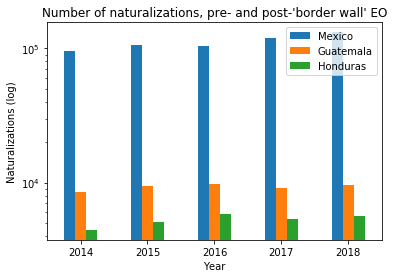

In [21]:
latin_df.reset_index(inplace=True) # 
latin_df.rename(columns={'index': 'Year'}, inplace=True)
latin_df.plot(y=['Mexico', 'Guatemala', 'Honduras'], kind="bar", logy=True)
plt.xticks(np.arange(5), ('2014', '2015', '2016', '2017', '2018'), rotation=0)
plt.title("Number of naturalizations, pre- and post-'border wall' EO")
plt.ylabel("Naturalizations (log)")
plt.xlabel("Year")
plt.legend(title=None)

plt.savefig('./Images/border_naturalizations.png')

### Takeaway
We found statistically significant differences for naturalization rates of Mexican, Guatemalan, and Honduran immigrants during the years immediately preceding and following the signing of the Trump "border wall" executive order. Surprisingly, these rates actually *increased*, rather than decreased, for Mexican and Honduran immigrants. Guatemalan naturalizations appear to stay roughly the same over time. However, these results should be interpreted carefully—naturalization is a process that takes time, and the individuals who were naturalized in 2017 and 2018 likely had been in the process of naturalization for months if not years before the EO was signed.

### 9/11

In [22]:
# Calculate expected values
muslim_countries =['Afghanistan','Iran','Yemen','Jordan','Saudi Arabia','Sudan','Pakistan','Syria','Oman']
muslim_df = nat_country_df.loc[muslim_countries, :].T
muslim_df = muslim_df.loc[['1999', '2000', '2005', '2006'],:]
pop = muslim_df.Afghanistan + muslim_df.Iran + muslim_df.Jordan + muslim_df['Saudi Arabia'] + \
                    muslim_df.Sudan + muslim_df['Pakistan'] + muslim_df['Syria'] + muslim_df['Oman']
muslim_nat_pop = pop.sum() # Get population size for Muslim naturalized immigrants

# Get yearly sample sizes
muslim_nat_99 = muslim_df.loc['1999'].sum()
muslim_nat_00 = muslim_df.loc['2000'].sum()
muslim_nat_05 = muslim_df.loc['2005'].sum()
muslim_nat_06 = muslim_df.loc['2006'].sum()

# Get by-country sample sizes
afg_nat = muslim_df.Afghanistan.sum() # analyze
iran_nat = muslim_df.Iran.sum() # analyze
jor_nat = muslim_df.Jordan.sum()
sud_nat = muslim_df.Sudan.sum()
saudi_nat = muslim_df['Saudi Arabia'].sum() # analyze
pakistan_nat = muslim_df.Pakistan.sum()
syr_nat = muslim_df['Syria'].sum()
oman_nat = muslim_df['Oman'].sum()

degrees_freedom_muslim = 24

# Expected values for Afghanistan
expected_afg_nat_99 = expected(muslim_nat_99, afg_nat, muslim_nat_pop)
expected_afg_nat_00 = expected(muslim_nat_00, afg_nat, muslim_nat_pop)
expected_afg_nat_05 = expected(muslim_nat_05, afg_nat, muslim_nat_pop)
expected_afg_nat_06 = expected(muslim_nat_06, afg_nat, muslim_nat_pop)

# Expected values for Iran
expected_iran_nat_99 = expected(muslim_nat_99, iran_nat, muslim_nat_pop)
expected_iran_nat_00 = expected(muslim_nat_00, iran_nat, muslim_nat_pop)
expected_iran_nat_05 = expected(muslim_nat_05, iran_nat, muslim_nat_pop)
expected_iran_nat_06 = expected(muslim_nat_06, iran_nat, muslim_nat_pop)

# Expected values for Syria
expected_syr_nat_99 = expected(muslim_nat_99, syr_nat, muslim_nat_pop)
expected_syr_nat_00 = expected(muslim_nat_00, syr_nat, muslim_nat_pop)
expected_syr_nat_05 = expected(muslim_nat_05, syr_nat, muslim_nat_pop)
expected_syr_nat_06 = expected(muslim_nat_06, syr_nat, muslim_nat_pop)

# Expected values for Saudi Arabia
expected_saudi_nat_99 = expected(muslim_nat_99, saudi_nat, muslim_nat_pop)
expected_saudi_nat_00 = expected(muslim_nat_00, saudi_nat, muslim_nat_pop)
expected_saudi_nat_05 = expected(muslim_nat_05, saudi_nat, muslim_nat_pop)
expected_saudi_nat_06 = expected(muslim_nat_06, saudi_nat, muslim_nat_pop)

afg_expected = [expected_afg_nat_99, expected_afg_nat_00, expected_afg_nat_05, expected_afg_nat_06]
iran_expected = [expected_iran_nat_99, expected_iran_nat_00, expected_iran_nat_05, expected_iran_nat_06]
syria_expected = [expected_syr_nat_99, expected_syr_nat_00, expected_syr_nat_05, expected_syr_nat_06]
saudi_expected = [expected_saudi_nat_99, expected_saudi_nat_00, expected_saudi_nat_05, expected_saudi_nat_06]

In [23]:
# Critical value is 41.34

print(chisquare(muslim_df.Afghanistan, f_exp=afg_expected))
print(chisquare(muslim_df.Iran, f_exp=iran_expected))
print(chisquare(muslim_df.Syria, f_exp=syria_expected))
print(chisquare(muslim_df['Saudi Arabia'], f_exp=saudi_expected))

Power_divergenceResult(statistic=325.9277040871687, pvalue=2.429547622651672e-70)
Power_divergenceResult(statistic=2058.4706120164647, pvalue=0.0)
Power_divergenceResult(statistic=69.94724367777054, pvalue=4.380818861752323e-15)
Power_divergenceResult(statistic=318.9672813898018, pvalue=7.803748075088794e-69)


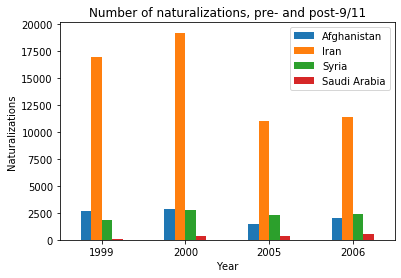

In [25]:
muslim_df.reset_index(inplace=True) # 
muslim_df.rename(columns={'index': 'Year'}, inplace=True)
muslim_df.plot(y=['Afghanistan', 'Iran', 'Syria', 'Saudi Arabia'], kind="bar")
plt.xticks(np.arange(4), ('1999', '2000', '2005', '2006'), rotation=0)
plt.title("Number of naturalizations, pre- and post-9/11")
plt.ylabel("Naturalizations")
plt.xlabel("Year")
plt.legend(title=None)

plt.savefig('./Images/911_naturalizations.png')

### Takeaway
We found statistically significant differences in the pre- and post-9/11 naturalization numbers for Afghan, Iranian, Syrian, and Saudi Arabian immigrants. We tried to account for the time-lag in immigration by sampling for 4-5 years following 9/11, rather than immediately following. Interestingly, though the number of naturalizations for Iranian immigrants dropped substantially and also noticably for Afghans, numbers for Saudi Arabians increased.

In [ ]:
# Stacy end

In [ ]:
# Kana start

# Persons Obtaining Legal Permanent Resident Status By State

In [26]:
# Read immigrants by state data
complete_state_df = pd.read_csv("Output_files/Immigrants By State.csv")
complete_state_df.head()

,State,2000,2018
0,AL,1894,3737
1,AK,1364,1375
2,AZ,11935,18335
3,AR,1594,3000
4,CA,216447,200897


In [27]:
# Initialize the map:
map_2000 = folium.Map(location=[37, -102], zoom_start=4)
state_geo = os.path.join("Resources/us-states.json")

# Add the color for the choloropleth:
map_2000.choropleth(geo_data = state_geo,
                    name = 'choropleth',
                    data = complete_state_df,
                    columns = ['State', '2000'],
                    key_on = 'feature.id',
                    fill_color = 'OrRd',
                    fill_opacity = 0.7,
                    line_opacity = 0.2,
                    threshold_scale=[0,500 ,50000, 100000, 200000, 250000],
                    legend_name='Number of Immigrants in 2000')

# Add the data layer to map
folium.LayerControl().add_to(map_2000)

# Show the map
map_2000

/Users/stacy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
# Retrive states information that has max and min number of immigrants for 2000
max_2000  = complete_state_df.sort_values("2000").tail(1)
min_2000  = complete_state_df.sort_values("2000", ascending=False).tail(1)

# print(f"Biggest: {max_2000["2000"]} people immigrated to {max_2000["State"]} in 2000.")
# print(f"Smallest: {max_2000["2000"]} people immigrated to {max_2000["State"]} in 2000.")

In [28]:
# Initialize the map
state_geo = os.path.join("Resources/us-states.json")
map_2018 = folium.Map(location=[37, -102], zoom_start=4)
 
# Add the color for the choloropleth:
map_2018.choropleth(geo_data = state_geo,
                    name = 'choropleth',
                    data = complete_state_df,
                    columns = ['State', '2018'],
                    key_on = 'feature.id',
                    fill_color = 'OrRd',
                    fill_opacity = 0.7,
                    line_opacity = 0.2,
                    threshold_scale=[0,500 ,50000, 100000, 200000, 250000],
                    legend_name ='Number of Immigrants in 2018')

# Add the data layer to map
folium.LayerControl().add_to(map_2018)

# Show the map
map_2018

In [29]:
# Retrive states information that has max and min number of immigrants for 2018
max_2018  = complete_state_df.sort_values("2018").tail(1)
min_2018  = complete_state_df.sort_values("2018", ascending=False).tail(1)
# print(f"Biggest: {max_2018["2018"]} people immigrated to {max_2018["State"]} in 2018.")
# print(f"Smallest: {max_2018["2018"]} people immigrated to {max_2018["State"]} in 2018.")

### Takeaway
Based on 2000 and 2018 comparison, California, New York, Florida, Texas and New Jersey were top 5 immigrants destination. This order didn't change between 2000 and 2018. In 2000, 62% of immigrants moved to one of top 5 states. In 2018, 57 % immigrants move to one of top 5 states, which show immigrants started immigrating to non-top 5 states.

# US Population vs Immigrants Population 1950 - 2017

In [30]:
# Read csv file for US population vs immigrants analysis
population_comparison = pd.read_csv("Output_files/US Population vs Immigrants.csv")
population_comparison.head()

,Year,Number of Immigrants,US Population
0,1950,10347400,158804397.0
1,1960,9738100,186720570.0
2,1970,9619300,209513340.0
3,1980,14079900,229476360.0
4,1990,19767300,252120309.0


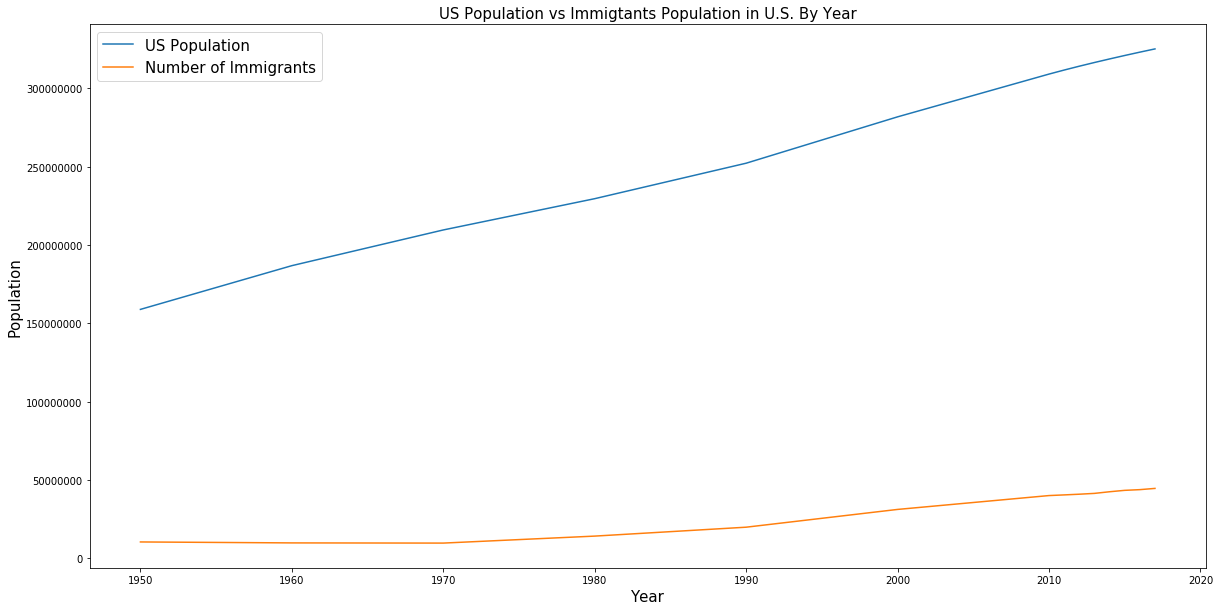

<Figure size 432x288 with 0 Axes>

In [32]:
# Change the figure size
plt.figure(figsize = (20,10))

# Plot us population vs year
plt.plot(population_comparison["Year"],population_comparison["US Population"])

# Plot us number of immigrans vs year
plt.plot(population_comparison["Year"],population_comparison["Number of Immigrants"])

# Set legend
plt.legend(['US Population','Number of Immigrants'], loc='upper left', fontsize=15)

# Set title
plt.title("US Population vs Immigtants Population in U.S. By Year", fontsize = 15)

# Set xlabel
plt.xlabel("Year",fontsize = 15)

# Set ylabel
plt.ylabel("Population", fontsize = 15)

# Change ticker label to plain from scientific
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

# Show the plot
plt.show()

plt.savefig('./Images/proportion_immigrants.png')

In [ ]:
# Kana end

In [ ]:
#Satish Start

## Lawful Permanent Resident Throughout time

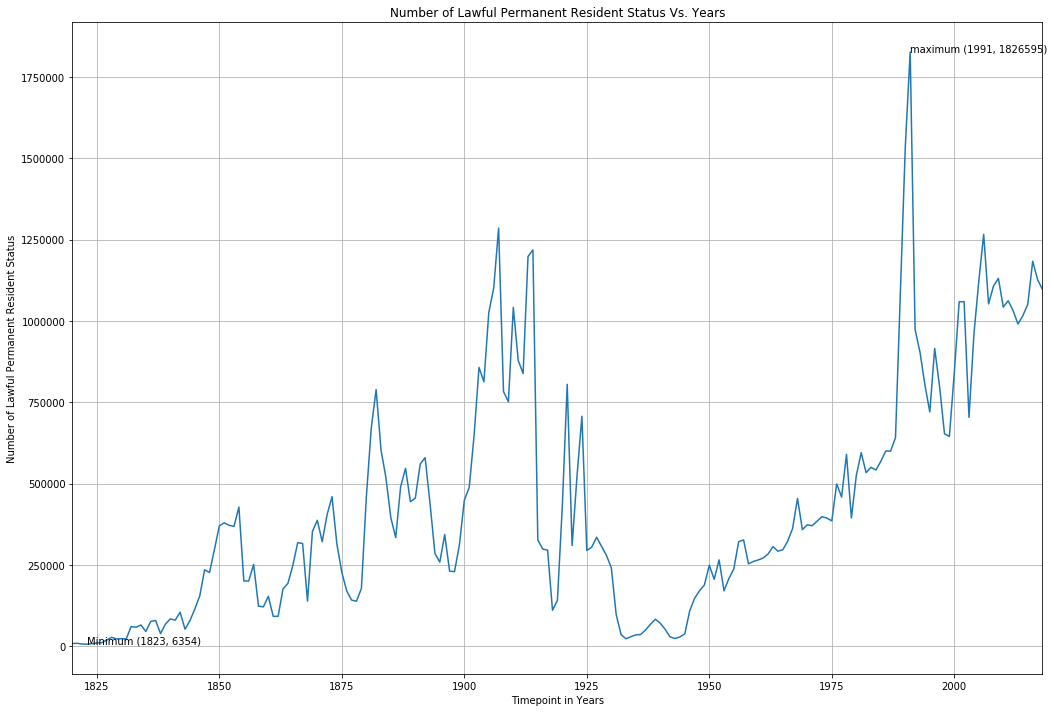

<Figure size 432x288 with 0 Axes>

In [65]:
immigration_df=pd.read_csv("Output_files/LPR_Years.csv")
immigration_df.Year=pd.to_numeric(immigration_df.Year)
immigration_df.Number=pd.to_numeric(immigration_df.Number)
immigration_plt=immigration_df.plot(kind="line", x="Year", y="Number", grid=True, figsize=(15,10),legend=False,title="Number of Lawful Permanent Resident Status Vs. Years")
max_arrow_y=immigration_df['Number'].max()
max_arrow_x=immigration_df.loc[immigration_df['Number']==max_arrow_y,"Year"].reset_index(drop=True)
plt.annotate(
    f"maximum {max_arrow_x[0],max_arrow_y}", 
    xy=(max_arrow_x[0], max_arrow_y))

min_arrow_y=immigration_df['Number'].min()
min_arrow_x=immigration_df.loc[immigration_df['Number']==min_arrow_y,"Year"].reset_index(drop=True)
plt.annotate(
    f"Minimum {min_arrow_x[0],min_arrow_y}", 
    xy=(min_arrow_x[0], min_arrow_y))

plt.ylabel("Number of Lawful Permanent Resident Status")
plt.xlabel("Timepoint in Years")
plt.tight_layout()
plt.show()

plt.savefig('./Images/overall_lpr.png')

## Central America LPR before and after Trump election

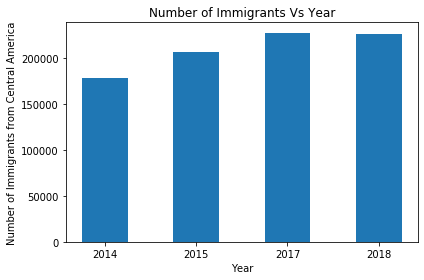

<Figure size 432x288 with 0 Axes>

In [36]:
Latin_Data_summ_df=pd.read_csv("Output_files/Latin_Data_summ_df.csv")
#Bar Graph showing the Central America and Years
Latin_Data_summ_df.plot.bar(x='Year', y='Count', rot=0,legend=False)
plt.axis('tight')
plt.title("Number of Immigrants Vs Year")
plt.ylabel("Number of Immigrants from Central America")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

plt.savefig('./Images/latino_lpr.png')

## Islamic Countries LPR before and after 9/11

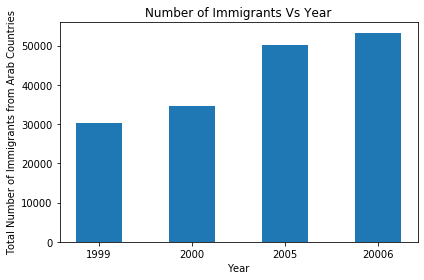

<Figure size 432x288 with 0 Axes>

In [37]:
Islam_Country_summ=pd.read_csv("Output_files/Islam_Country_summ.csv")
#Ploting the Graph
Islam_Country_summ.plot.bar(x='Year', y='Count', rot=0,legend=False)
plt.axis('tight')
plt.title("Number of Immigrants Vs Year")
plt.ylabel("Total Number of Immigrants from Arab Countries")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

plt.savefig('./Images/muslim_lpr.png')

In [38]:
location_df=pd.read_csv("Output_files/location_df.csv").reset_index(drop=True)
location_df=location_df.iloc[:, 1:]
Country_Data_Merged=pd.read_csv("Output_files/Country_Data_Merged.csv")

## Major Historical events didnt impact LPR count from Islaminc and Central America. One reason could be the petitions were filed before the events occured.

## Heat Map showing Immigration from all over the world to US

In [39]:
#Configuring gmpas
gmaps.configure(api_key=gkey)

fig = gmaps.figure()

#Creating Heat Map
heat_layer = gmaps.heatmap_layer(location_df, weights=Country_Data_Merged['Total'], 
                                 dissipating=False, max_intensity=90000,
                                 point_radius = 1)
#Adding heat maps
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

## Highest Immigrants in last 30 years is from Mexico around 6.2 Million , lowest is from Maldives around 121. Due to Large difference between top and bottom countries, heatmap is failing to capture the bottom countries. To get all the countries in the heatmap,we have to use mean value for intensity. This caused having Red for all the countries which has count more than mean and green for low countries.

## Statistical Analysis between Islamic and Central America's LPR before and after 9/11

In [40]:
Central_America_Data=['Mexico', 'Guatemala', 'Honduras', 'Nicaragua', 'El Salvador', 'Costa Rica', 'Panama', 'Belize']
Latin_Population=Country_Data_Merged[Country_Data_Merged['Region and country of birth'].isin(Central_America_Data)].T
Islam_Country_Data=['Afghanistan','Iran','Yemen','Jordan','Saudi Arabia','Sudan','Pakistan','Syria','Oman']
Islam_Population=Country_Data_Merged[Country_Data_Merged['Region and country of birth'].isin(Islam_Country_Data)].T

In [41]:
Latin_Population=Latin_Population[2:]
#df.groupby(['']).mean()
#new_header_Latin = Country_Data_2018_df.iloc[0]
Latin_Population_1999=Latin_Population.loc['1999',:].sum()
Latin_Population_2000=Latin_Population.loc['2000',:].sum()
Latin_Population_2005=Latin_Population.loc['2005',:].sum()
Latin_Population_2006=Latin_Population.loc['2006',:].sum()
Islam_Population_1999=Islam_Population.loc['1999',:].sum()
Islam_Population_2000=Islam_Population.loc['2000',:].sum()
Islam_Population_2005=Islam_Population.loc['2005',:].sum()
Islam_Population_2006=Islam_Population.loc['2006',:].sum()
List_total=[['1999',Latin_Population_1999,Islam_Population_1999],['2000',Latin_Population_2000,Islam_Population_2000],['2005',Latin_Population_2005,Islam_Population_2005],['2006',Latin_Population_2006,Islam_Population_2006]]

In [42]:
List_total_df=pd.DataFrame(List_total, columns=['Year','Latin America', 'Islam Country'])
Total_1999=Latin_Population_1999+Islam_Population_1999
Total_2000=Latin_Population_2000+Islam_Population_2000
Total_2005=Latin_Population_2005+Islam_Population_2005
Total_2006=Latin_Population_2006+Islam_Population_2006

In [43]:
Latin_Total=Latin_Population_1999+Latin_Population_2000+Latin_Population_2005+Latin_Population_2006
Islam_Total=Islam_Population_1999+Islam_Population_2000+Islam_Population_2005+Islam_Population_2006
Grand_Total=Latin_Total+Islam_Total

In [44]:
expected_99 = expected(Total_1999, Islam_Total, Grand_Total)
expected_00 = expected(Total_2000, Islam_Total, Grand_Total)
expected_05 = expected(Total_2005, Islam_Total, Grand_Total)
expected_06 = expected(Total_2006, Islam_Total, Grand_Total)
expected_list=[expected_99,expected_00,expected_05,expected_06]
expected_list

[35094.409, 43101.62, 42072.038, 47955.933]

In [45]:
degree_of_freedom=3
critical_value=7.815
from scipy.stats import chisquare

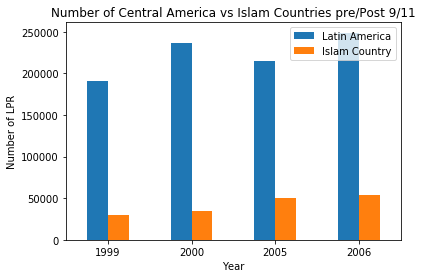

In [46]:
List_total_df.plot(kind="bar")
plt.xticks(np.arange(4), ('1999', '2000', '2005', '2006'), rotation=0)
plt.title("Number of Central America vs Islam Countries pre/Post 9/11")
plt.ylabel("Number of LPR")
plt.xlabel("Year")
plt.show()

In [47]:
chisquare([ 675.63878934, 1636.52359017, 1512.45163711,  583.77323195], f_exp=expected_list, ddof=degree_of_freedom)

Power_divergenceResult(statistic=159543.84762566458, pvalue=nan)

#### We found statistically significant differences for LPR rates between Islamic countries and Central America after 9/11 . Even though the number of immigrants from Islam countries slightly increased as compare to pre 9/11 , but the rate of increase is less than the Central America.

In [48]:
# Satish end

In [49]:
# Umar start

In [50]:
age = './Output_files/la_age.csv'
age_pd =pd.read_csv(age)
New_age_pd = age_pd.rename(columns={'Lawful Permanent Resident 2009': 'Lawful 2009'})
New_age_pd.head()

Final_age = New_age_pd.set_index('Age')
New_age = Final_age.iloc[1:,:]
New_age

,Asylum 2009,Asylum 2018,Lawful 2009,Lawful 2018
Age,,,,
< 16,22288.0,4837.0,185960.0,177300.0
16 - 20,7889.0,3278.0,101864.0,85830.0
21+,44425.0,17324.0,842992.0,833481.0


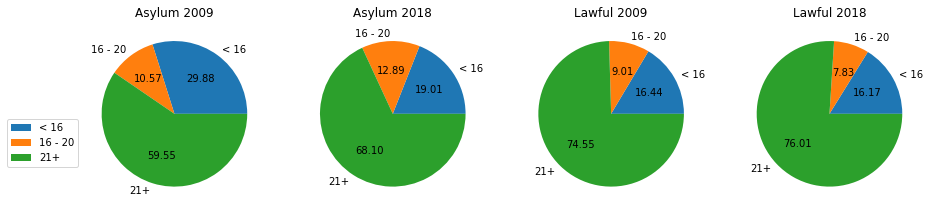

In [63]:
fig, axes = plt.subplots(1,4, figsize=(15,9)) 
for ax, col in zip(axes, New_age.columns): 
    ax.pie(New_age[col], labels=New_age.index, autopct='%.2f') 
    ax.set(ylabel='', title=col, aspect='equal') 
axes[0].legend(bbox_to_anchor=(0, 0.5)) 
fig.savefig('./Images/lpr_asylum_age.png') 
plt.show()

In [54]:
marital = './Output_files/la_marital.csv' 
marital_pd =pd.read_csv(marital) 
marital_pd.head()

,Marital Status,Asylum 2009,Asylum 2018,Lawful 2009,Lawful 2018
0,Single,40798.0,14154.0,417232.0,400196.0
1,Married,29770.0,10142.0,654674.0,627443.0
2,Widowed,2452.0,232.0,28439.0,26579.0
3,Divorced/separated,1483.0,896.0,26015.0,32416.0
4,Unknown,99.0,15.0,4458.0,9977.0


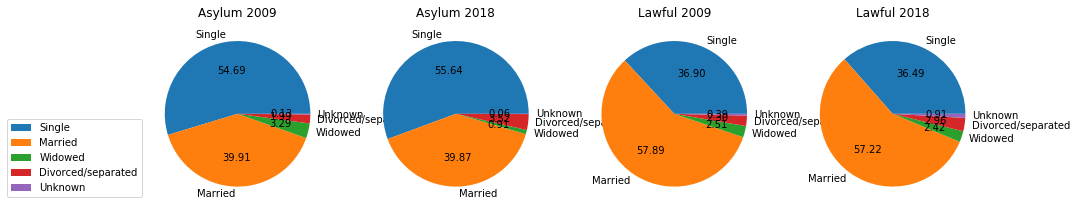

In [62]:
marital = './Output_files/la_marital.csv' 
marital_pd =pd.read_csv(marital) 
marital_pd.head()

Final_marital = marital_pd.set_index('Marital Status') 
New_marital = Final_marital.iloc[:,:] 
New_marital

fig, axes = plt.subplots(1,4, figsize=(15,9)) 
for ax, col in zip(axes, New_marital.columns): 
    ax.pie(New_marital[col], labels=New_marital.index, autopct='%.2f') 
    ax.set(ylabel='', title=col, aspect='equal') 
axes[0].legend(bbox_to_anchor=(0, 0.5)) 
fig.savefig('./Images/lpr_asylum_marital.png')
plt.show()

In [59]:
sex = './Output_files/la_sex.csv' 
sex_pd =pd.read_csv(sex) 
New_sex_pd = sex_pd.rename(columns={'Unnamed: 0': 'Sex'}) 
New_sex_pd.head()

Final_sex = New_sex_pd.set_index('Sex') 
Graph_sex = Final_sex.iloc[1:,:] 
Graph_sex

,Asylum 2009,Asylum 2018,Lawful 2009,Lawful 2018
Sex,,,,
Male,38491.0,12956.0,513015.0,512176.0
Female,36111.0,12483.0,617799.0,584426.0


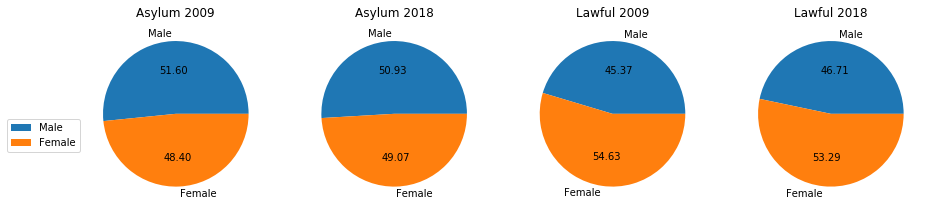

In [61]:
fig, axes = plt.subplots(1,4, figsize=(15,9))
for ax, col in zip(axes, Graph_sex.columns):
    ax.pie(Graph_sex[col], labels=Graph_sex.index, autopct='%.2f')
    ax.set(ylabel='', title=col, aspect='equal')
axes[0].legend(bbox_to_anchor=(0, 0.5))
fig.savefig('./Images/lpr_asylum_sex.png')
plt.show()

In [ ]:
# Umar End